In [12]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as linregress

# Path to collect data from the Resources folder

housing_data_df = pd.read_csv("BC_cities Housing_data.csv")

housing_data_df.head()

,REF_DATE,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,223,units,0,v1344408890,343.1.1.1.1.1,5870.0,NaN,NaN,NaN,0
1,2019,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,223,units,0,v1344408890,343.1.1.1.1.1,5590.0,A,NaN,NaN,0
2,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,81,units,0,v1344408893,343.1.1.1.1.2,60000.0,NaN,NaN,NaN,0
3,2019,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,81,units,0,v1344408893,343.1.1.1.1.2,65000.0,A,NaN,NaN,0
4,2018,"Abbotsford - Mission, Census metropolitan area...",2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average family total income,Dollars,81,units,0,v1344408895,343.1.1.1.1.4,115000.0,NaN,NaN,NaN,0


In [13]:
# Renaming column, REF_DATE to Year:
housing_data_df = housing_data_df.rename(columns={'REF_DATE': 'Year'})

In [14]:
# Cleaning up "GEO" column to show just the city name:
housing_data_df['GEO'] = housing_data_df['GEO'].str.replace(r"- Mission, Census metropolitan area \(CMA\)", '', regex=True)
housing_data_df['GEO'] = housing_data_df['GEO'].str.replace(r", Census metropolitan area \(CMA\)", '', regex=True)
housing_data_df['GEO'] = housing_data_df['GEO'].str.replace(r", Census agglomeration \(CA\)", '', regex=True)

In [15]:
# Cleaning up and looking for Null Values in the data:
housing_data_df.dropna(subset = ["VALUE"])

,Year,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,223,units,0,v1344408890,343.1.1.1.1.1,5870.0,NaN,NaN,NaN,0
1,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,223,units,0,v1344408890,343.1.1.1.1.1,5590.0,A,NaN,NaN,0
2,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,81,units,0,v1344408893,343.1.1.1.1.2,60000.0,NaN,NaN,NaN,0
3,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,81,units,0,v1344408893,343.1.1.1.1.2,65000.0,A,NaN,NaN,0
4,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average family total income,Dollars,81,units,0,v1344408895,343.1.1.1.1.4,115000.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285115,2019,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Admission category not applicable (non-immigrant),Average family total income,Dollars,81,units,0,v1344629588,487.4.4.3.25.4,185000.0,A,NaN,NaN,0
285116,2018,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Admission category not applicable (non-immigrant),Average sale price,Dollars,81,units,0,v1344629590,487.4.4.3.25.6,310000.0,NaN,NaN,NaN,0
285117,2019,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Admission category not applicable (non-immigrant),Average sale price,Dollars,81,units,0,v1344629590,487.4.4.3.25.6,440000.0,A,NaN,NaN,0
285118,2018,Outside of census metropolitan areas (CMAs) an...,NaN,Buyer in a group of three or more,55 years old and over,Not first-time home buyer,Admission category not applicable (non-immigrant),Average buyer age,Years,308,units,0,v1344629584,487.4.4.3.25.10,65.0,NaN,NaN,NaN,0


In [16]:
# Drop not needed columns:
clean_data_df = housing_data_df.drop(["UOM_ID","SCALAR_FACTOR", "STATUS", "SYMBOL", "TERMINATED"], axis=1) 
clean_data_df.head()


,Year,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,0,v1344408890,343.1.1.1.1.1,5870.0,0
1,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Number of property buyers,Number,0,v1344408890,343.1.1.1.1.1,5590.0,0
2,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,0,v1344408893,343.1.1.1.1.2,60000.0,0
3,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average total income of property buyer,Dollars,0,v1344408893,343.1.1.1.1.2,65000.0,0
4,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories","Total, all sex of property buyer categories",Average family total income,Dollars,0,v1344408895,343.1.1.1.1.4,115000.0,0


In [17]:
clean_data_df["Estimates"].value_counts()

Number of property buyers                 57024
Average total income of property buyer    57024
Average family total income               57024
Average sale price                        57024
Average buyer age                         57024
Name: Estimates, dtype: int64

In [18]:
#Filtering a dataframe for just the variables we are measuring, Buyer Charecteristics = Immigrant & Non-Immigrant Status:

#Creating a list for Immigrant and Non-Immigrant:
list_immigrant_status=["Immigrant","Non-immigrant" ]

#Entering list to help filter into a new dataframe:
immigration_filter_df = clean_data_df.loc[clean_data_df["Buyer characteristics"] .isin(list_immigrant_status)]                                                                                                        
                                                                                                             
immigration_filter_df.head()

,Year,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
90,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Number of property buyers,Number,0,v1344408989,343.1.1.1.10.1,2695.0,0
91,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Number of property buyers,Number,0,v1344408989,343.1.1.1.10.1,2485.0,0
92,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Average total income of property buyer,Dollars,0,v1344408992,343.1.1.1.10.2,50000.0,0
93,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Average total income of property buyer,Dollars,0,v1344408992,343.1.1.1.10.2,55000.0,0
94,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Average family total income,Dollars,0,v1344408994,343.1.1.1.10.4,100000.0,0


In [19]:
#Using the Immigration status filtered dataframe to isolate the independent variable totals:

immigrant_price_df_ESTIMATES= immigration_filter_df.loc[(immigration_filter_df["Estimates"]=="Number of property buyers") &
                    (immigration_filter_df["Number of buyers as part of a property sale"]=="Total, all number of buyers categories") &
                    (immigration_filter_df["Age groups"]=="Total, all age groups") &
                    (immigration_filter_df["First-time home buyer status"]=="Total, all home buyers categories")]

immigrant_price_df_ESTIMATES.head()

,Year,GEO,DGUID,Number of buyers as part of a property sale,Age groups,First-time home buyer status,Buyer characteristics,Estimates,UOM,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
90,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Number of property buyers,Number,0,v1344408989,343.1.1.1.10.1,2695.0,0
91,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Number of property buyers,Number,0,v1344408989,343.1.1.1.10.1,2485.0,0
100,2018,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Non-immigrant,Number of property buyers,Number,0,v1344409000,343.1.1.1.11.1,3170.0,0
101,2019,Abbotsford,2016S0503932,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Non-immigrant,Number of property buyers,Number,0,v1344409000,343.1.1.1.11.1,3100.0,0
10650,2018,Campbell River,2016S0504944,"Total, all number of buyers categories","Total, all age groups","Total, all home buyers categories",Immigrant,Number of property buyers,Number,0,v1344513533,346.1.1.1.10.1,175.0,0


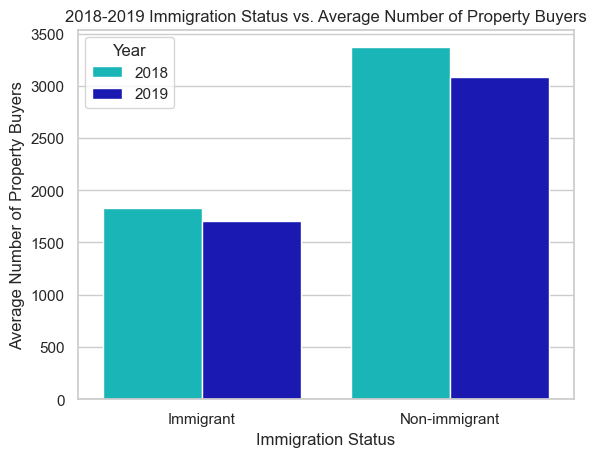

In [20]:
# Importing seaborn library to help plot a cluster bar graph:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Create clustered bar graph using seaborn:
sns.barplot(x='Buyer characteristics', y='VALUE', hue='Year', data=immigrant_price_df_ESTIMATES, errorbar=None, palette=['darkturquoise', 'mediumblue']) 

plt.title("2018-2019 Immigration Status vs. Average Number of Property Buyers")

# Labelling cluster bar graph axis
plt.xlabel("Immigration Status")
plt.ylabel("Average Number of Property Buyers")

# Save graph in folders:
plt.savefig(r"Figure_1.png")

*ANALYSIS*:
There is a significant difference between property bought by Immigrants and Non-Immigrants. Almost 50% more houses were bought by Non-Immigrants against Immigrants. The trend follows for both years; 2018 and 2019. This can be explained by the different priority of people in Immigrant Status and also alludes to the inherited wealth/ assets that can be leveraged in the housing market. 

In [21]:
# Run analysis against Immigrant Average Sale Price and Average total income of property buyer:

# 1) Create dataframe with immigration filtered from original data to isolate the Average Sale Price:
immigrant_status_df1 = immigration_filter_df.loc[(immigration_filter_df["Estimates"]== "Average sale price") &
                    (immigration_filter_df["Number of buyers as part of a property sale"]=="Total, all number of buyers categories") &
                    (immigration_filter_df["Age groups"]=="Total, all age groups") &
                    (immigration_filter_df["First-time home buyer status"]=="Total, all home buyers categories")]


# 2) Create dataframe with immigration filtered from original data to isolate the Average total income of property buyer:
immigrant_status_df2 = immigration_filter_df.loc[(immigration_filter_df["Estimates"]== "Average total income of property buyer") &
                    (immigration_filter_df["Number of buyers as part of a property sale"]=="Total, all number of buyers categories") &
                    (immigration_filter_df["Age groups"]=="Total, all age groups") &
                    (immigration_filter_df["First-time home buyer status"]=="Total, all home buyers categories")]



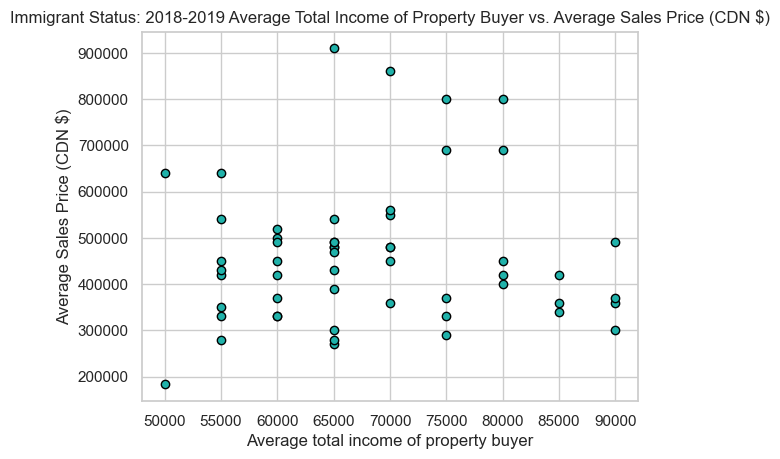

In [22]:
# IMMIGRANT STATUS: Scatter Plot for Average Sale Price vs. Average family total income for ALL years:

# 1) Filtering Estimates column to equal "Average sale price", isolating the value:


price_average_df = immigrant_status_df1[immigrant_status_df1["Buyer characteristics"]=="Immigrant"]

price_value = price_average_df["VALUE"]


# 2) Filtering Estimates column to equal "Average total income of property buyer", isolating the value:
avg_tot_income_df = immigrant_status_df2[immigrant_status_df2["Buyer characteristics"]=="Immigrant"]

avg_tot_income_value = avg_tot_income_df["VALUE"]

               

# Plot Scatter plot:

x_axis= avg_tot_income_value

plt.xlabel("Average total income of property buyer")
plt.ylabel("Average Sales Price (CDN $)")
plt.title("Immigrant Status: 2018-2019 Average Total Income of Property Buyer vs. Average Sales Price (CDN $)")

plt.scatter(x_axis, price_value, facecolors="lightseagreen", edgecolors="black")

plt.show()




The r-value is: 0.0014308248350028863


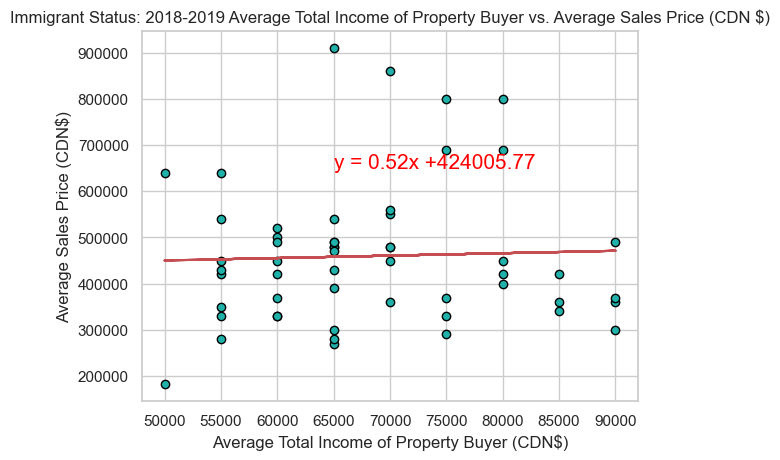

In [23]:
# Regression Line on Plot Scatter plot for 2018:


# avg_tot_income_value2018 = avg_tot_income_value2018.astype(float)

# correlation = st.pearsonr(x_axis, avg_tot_income_value2018)
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, avg_tot_income_value2018)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Linear regression on Northern Hemisphere
import numpy as np
# Linear regression of Latitude vs. Max. Temp:
import scipy.stats as linregress
from scipy import stats

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(avg_tot_income_df["VALUE"], price_average_df["VALUE"])

regress_values = x_axis * slope + intercept

# Create Line Equation String:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot:
plt.scatter(x_axis, price_value, facecolors="lightseagreen", edgecolors="black")
plt.plot(x_axis,regress_values,"r-")


# Label plot and annotate the line equation:
plt.xlabel("Average Total Income of Property Buyer (CDN$)")
plt.ylabel("Average Sales Price (CDN$)")
plt.title("Immigrant Status: 2018-2019 Average Total Income of Property Buyer vs. Average Sales Price (CDN $)")
plt.annotate(line_eq,(65000,650000),fontsize=15,color="red")


# Print r value
print(f"The r-value is: {rvalue**2}")



# Save graph in folders:
plt.savefig(r"Figure_2.png")




*ANALYSIS:*
Looking at the Property Buyers belonging in the Immigrant Status group for 2018-2019 and the correlation between Average Sales Price and Average Total Income of the Property Buyer, we can say there is no correlation. With a low r-value of 0.0143, which is less than 0.30, it would indicate no correlation according to the Pearson Corrolation. This can show that there are multiple factors affecting the Price at the same time rather than just the income. 

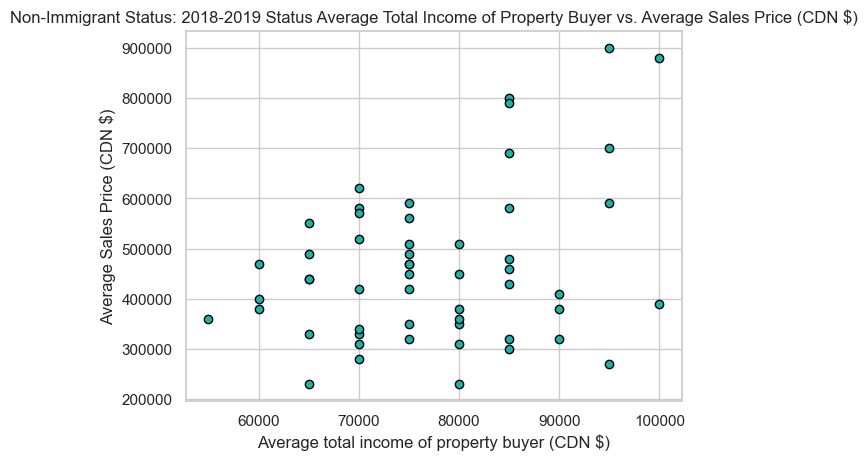

In [24]:
# NON-IMMIGRANT STATUS: For 2018 Scatter Plot for Average Sale Price vs. Average family total income:

# 1) Filtering Estimates column to equal "Average sale price", isolating the value:


non_immi_price_average_df = immigrant_status_df1[immigrant_status_df1["Buyer characteristics"]=="Non-immigrant"]

non_immi_price_value = non_immi_price_average_df["VALUE"]


# 2) Filtering Estimates column to equal "Average total income of property buyer", isolating the value:
non_immi_avg_tot_income_df = immigrant_status_df2[immigrant_status_df2["Buyer characteristics"]=="Non-immigrant"]

non_immi_avg_tot_income_value = non_immi_avg_tot_income_df["VALUE"]

               

# Plot Scatter plot for 2018 Non-Immigrant Status:

x_axis1= non_immi_avg_tot_income_value

plt.xlabel("Average total income of property buyer (CDN $)")
plt.ylabel("Average Sales Price (CDN $)")
plt.title("Non-Immigrant Status: 2018-2019 Status Average Total Income of Property Buyer vs. Average Sales Price (CDN $)")

plt.scatter(x_axis1, non_immi_price_value, facecolors="lightseagreen", edgecolors="black")

plt.show()



The r-value is: 0.10254964043107899


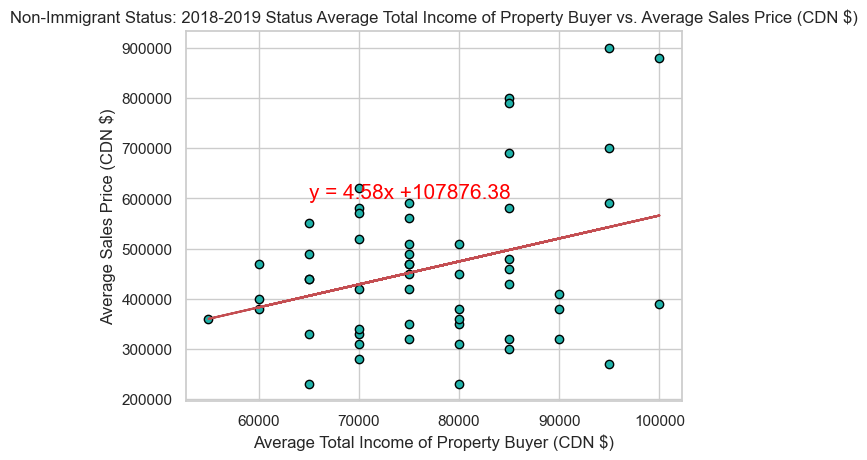

In [25]:
#Calculating the regressioin line:

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(non_immi_avg_tot_income_df["VALUE"], non_immi_price_average_df["VALUE"])

regress_values = x_axis1 * slope + intercept

# Create Line Equation String:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot:
plt.scatter(x_axis1, non_immi_price_value, facecolors="lightseagreen", edgecolors="black")
plt.plot(x_axis1,regress_values,"r-")


# Label plot and annotate the line equation:
plt.xlabel("Average Total Income of Property Buyer (CDN $)")
plt.ylabel("Average Sales Price (CDN $)")
plt.title("Non-Immigrant Status: 2018-2019 Status Average Total Income of Property Buyer vs. Average Sales Price (CDN $)")
plt.annotate(line_eq,(65000,600000),fontsize=15,color="red")

#fig, ax = plt.subplots()
# ax.plot(100*np.random.rand(20))

# Use automatic StrMethodFormatter
# ax.yaxis.set_major_formatter('${x:1.2f}')


# Print r value
# print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.show()

# Save graph in folders:
plt.savefig(r"Figure_3.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

*ANALYSIS*:
With the regression test we can see that r-value is less than 0.30 meaning it has no correlation. There is no correlation between the Average Price and Average Total Income of Property Buyer in BC, this can indicate that there are multiple other factors thatn can affect it. 